<a href="https://colab.research.google.com/github/gustavox0/MasterBigData/blob/main/M2_AI1_SalazarGustavo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
#monto la carpeta de drive para trabajar los archivos desde ahí
##Importante: modificar esto antes de enviar la tarea.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
#Cargo los paquetes pandas y numpy como pd y np, respectivamente
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
#Cargo la base de gasolinas
df=pd.read_csv('/content/drive/My Drive/Colab Notebooks/Tema1MBDDS/precio_gasolina.csv',sep=';')
#df=pd.read_csv('/content/My Drive/Colab Notebooks/Tema1MBDDS/precio_gasolina.csv',sep=';')
df.head()

,Provincia,Localidad,Codigo_postal,Direccion,Margen,Toma_de_datos,Precio,Rotulo,Tipo_venta,Rem,Horario,Tipo_servicio,Fecha_extraccion
0,SANTA CRUZ DE TENERIFE,CUESTA LA,38320,AVENIDA LOS MENCEYES 223,D,01 08 2020 1353,"0,758",PCAN,P,dm,LD 24H,LD 24H A,01 08 2020
1,SANTA CRUZ DE TENERIFE,LA LAGUNA,38200,CARRETERA TF111 KM 8 346,D,01 08 2020 0900,"0,759",OCEANO,P,dm,LS 06002200 D 07002200,LS 06002200 A D 07002200 A,01 08 2020
2,SANTA CRUZ DE TENERIFE,SANTA CRUZ DE TENERIFE,38110,CALLE LAURA GROTE DE LA PUERTA 2,D,27 07 2020 1202,"0,769",GMOIL,P,dm,LV 24H S 06002000 D 08001500,LV 24H A S 06002000 A D 08001500 A,01 08 2020
3,SANTA CRUZ DE TENERIFE,SANTA CRUZ DE TENERIFE,38010,POLIGONO EL MAYORAZGO SN,N,29 07 2020 0000,"0,789",TGASTU TREBOL,P,dm,LS 07302100 D 08001400,LS 07302100 A D 08001400 A,01 08 2020
4,SANTA CRUZ DE TENERIFE,ADEJE,38670,CALLE CHARFA ESQUINA AVENIDA LAS PALMITAS SN,D,27 07 2020 1159,"0,789",GMOIL,P,dm,LS 07002200 D 09001600,LS 07002200 A D 09001600 A,01 08 2020


In [13]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9991 entries, 0 to 9990
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Provincia         9991 non-null   object
 1   Localidad         9991 non-null   object
 2   Codigo_postal     9991 non-null   int64 
 3   Direccion         9991 non-null   object
 4   Margen            9991 non-null   object
 5   Toma_de_datos     9991 non-null   object
 6   Precio            9991 non-null   object
 7   Rotulo            9990 non-null   object
 8   Tipo_venta        9991 non-null   object
 9   Rem               9991 non-null   object
 10  Horario           9991 non-null   object
 11  Tipo_servicio     9845 non-null   object
 12  Fecha_extraccion  9991 non-null   object
dtypes: int64(1), object(12)
memory usage: 1014.8+ KB
None


#Ejercicio 1
Identifica el número total de observaciones y variables totales en el dataset. Calcula el número de nulos de cada variable.¿Qué aporta esta información?


##1.1 Número total de observaciones y variables
Para el total de observaciones y variables utilizo el atributo shape. Este atributo devuelve, en este caso,  el tamaño del arreglo (x,y), con **x** el número de observaciones y **y** el número de columnas.

In [16]:
print("Número de observaciones")
print(df.shape[0])
print("Número de variables")
print(df.shape[1])
print("Nombre de las 13 variables")
print(df.columns)

Número de observaciones
9991
Número de variables
13
Nombre de las 13 variables
Index(['Provincia', 'Localidad', 'Codigo_postal', 'Direccion', 'Margen',
       'Toma_de_datos', 'Precio', 'Rotulo', 'Tipo_venta', 'Rem', 'Horario',
       'Tipo_servicio', 'Fecha_extraccion'],
      dtype='object')


##1.2 Número de nulos por variable
Para ver los valores nulos por variable, utilizo la función vectorial isnull(). Este nos arroja los valores no nulos de cada variable

In [ ]:
print("Valores nulos por variable")
Nulos = df.isnull().sum()
print(Nulos)

Valores nulos por variable
Provincia             0
Localidad             0
Codigo_postal         0
Direccion             0
Margen                0
Toma_de_datos         0
Precio                0
Rotulo                1
Tipo_venta            0
Rem                   0
Horario               0
Tipo_servicio       146
Fecha_extraccion      0
dtype: int64


##1.3 ¿Qué aporta esta información?
Al conocer el número de nulos que contiene cada variable, podemos decidir qué tan completa es la información del dataset y de qué manera podemos tratar la información faltante. En este caso, únicamente las variables "Precio" y "Tipo_servicio" cuentan con valores nulos. en el caso de Precio, esto representa solo 1/9991 (0.01%) y en el caso de Tipo_servicio, el 146/9991 (1.46%).

#Ejercicio 2
Identifica el tipo de variables a nivel estadístico que corresponden cada una del dataset. Debes explicar el motivo por el cual haces dicha clasificación.
Para clasificar cada variable, visualizo 5 datos aleatorios de los valores que toma cada una de ellas.


1. **Provincia**: Identifica el nombre de la provincia en que se realizó la venta. No establece ningun orden. Se trata de una variable cualitativa nominal o de atributo.

In [17]:
print(df['Provincia'].sample(5))

8133    CASTELLON  CASTELLO
3664               ZARAGOZA
4574                CACERES
2335               PALENCIA
3002                   LEON
Name: Provincia, dtype: object


2. **Localidad**: Identifica la localidad en que se realizó la venta. No establece ningún orden. Se trata de una variable cualitativa o de atributo.

In [18]:
print(df['Localidad'].sample(5))

6624        ENCINA LA        
4499         GRIJOTA         
1509                 ALBACETE
7493    MONFORTE DEL CID     
3327     OTERO DE BODAS      
Name: Localidad, dtype: object


3. **Codigo_postal**: Identifica el código postal del lugar en que se realizó la venta. Es una variable cualitativa o de atributo

In [19]:
print(df['Codigo_postal'].sample(5))

9532     8031
1262    30740
6415    32630
4058    30396
9886    17750
Name: Codigo_postal, dtype: int64


4. **Direccion**: Identifica el lugar especifico en que se realizó la venta (ubicación de la estación). Es una variable cualitativa o de atributo.

In [20]:
print(df['Direccion'].sample(5))

6212    JOSE NOVO SN NACIONAL 550 km 89 
8950               PARTIDA LA REDONDA SN
8594                  AUTOVIA A52 KM 535
8145             CARRETERA M111 KM 8 200
4684          POLIGONO FINCA EQ SECTOR 9
Name: Direccion, dtype: object


5. **Margen**: Solo toma los valores D, I y N. Por tanto, es una variable cualitativa  o categórica.

In [21]:
print(df['Margen'].sample(5))

7680    D
1805    D
8280    I
9006    N
8336    I
Name: Margen, dtype: object


6. **Toma_de_datos**: Contiene la fecha y hora en que se tomó el registro de la información. Sirve para clasificar el momento en que fue realizada la venta. Es una variable cualitativa o de atributo (clasificación).

In [22]:
print(df['Toma_de_datos'].sample(5))

6266    31 07 2020 1245
3062    29 07 2020 1640
4261    20 07 2020 2008
6788    31 07 2020 2300
8714    31 07 2020 1331
Name: Toma_de_datos, dtype: object


7. **Precio**: Indica el precio de la gasolina en euros. Es una medición numérica, por lo que es de tipo cuantitativo.

In [23]:
print(df['Precio'].sample(5))

7142    1,199
3320    1,149
9302    1,239
5483    1,179
8723    1,229
Name: Precio, dtype: object


8. **Rotulo**: Identifica el nombre del establecimiento en que se realizó la venta. No tiene ningun orden. Se trata de una variable cualitativa

In [24]:
print(df['Rotulo'].sample(5))

3065                   CARREFOUR
6929    AGLAES VIRGEN DE CUADROS
1221    RURAL SAN VICENTE FERRER
9868                      GRATSA
8022                      REPSOL
Name: Rotulo, dtype: object


9. **Tipo_venta**: Variable que identifica la forma en que se realizo la venta. solo toma dos valores, P y R. Se trata de una variable cualitativa binaria.

In [25]:
print(df['Tipo_venta'].sample(5))

7867    P
1981    P
2055    P
8141    P
5134    P
Name: Tipo_venta, dtype: object


10. **Rem**: Registra si los datos proceden de un operador mayorista o minorista. Solo toma los valores OM y DM. Por tanto, se trata de una variable cualitativa binaria.

In [26]:
print(df['Rem'].sample(5))

9051    dm
2647    dm
4382    OM
967     dm
1285    dm
Name: Rem, dtype: object


11. **Horario**: Identifica los dias de la semana y el horario de operacion de la estacion de servicio. Se trata de una variable cualitativa o de atributo.

In [27]:
print(df['Horario'].sample(5))

5103                L 07002100
543                     LD 24H
5994               LD 06302230
1022                    LD 24H
3526    LV 07002200 S 08001300
Name: Horario, dtype: object


12. **Tipo_servicio**: Identifica la forma en que es realizado el serivicio en la estacion. Toma los valores P,A,D. Se trata de una variable cualitativa categórica o de clasificación.

In [28]:
print(df['Tipo_servicio'].sample(5))

4173                         LD 24H  A 
783                          LD 24H  D 
3431                    LD 06002200  A 
5158    LV 06302300  A  SD 07002300  A 
8992                    LD 06002359  A 
Name: Tipo_servicio, dtype: object


13. **Fecha_extraccion**: Indica la fecha y hora de la extracción de la información. Sirve solo para saber el momento en que se extrajo la información. Se trata de una variable cualitativa.

In [29]:
print(df['Fecha_extraccion'].sample(5))

3417    01 08 2020
9492    01 08 2020
1125    01 08 2020
4385    01 08 2020
1484    01 08 2020
Name: Fecha_extraccion, dtype: object


#Ejercicio 3
Crear una tabla de frecuencias y el gráfico correspondiente para cada una de las variables siguientes: provincia, margen y precio.

##3.1 Tabla de frecuencias y gráfico

##Provincia

###Frecuencia

In [41]:
print(df["Provincia"].value_counts())

Provincia
MADRID                    730
BARCELONA                 723
VALENCIA                  568
ALICANTE                  408
SEVILLA                   385
MURCIA                    384
MALAGA                    296
CORUNA A                  257
GRANADA                   250
CADIZ                     244
GIRONA                    243
TOLEDO                    235
PALMAS LAS                231
JAEN                      225
SANTA CRUZ DE TENERIFE    223
TARRAGONA                 212
ZARAGOZA                  212
BADAJOZ                   207
ASTURIAS                  203
NAVARRA                   202
CORDOBA                   195
BALEARS ILLES             194
ALMERIA                   184
PONTEVEDRA                184
CIUDAD REAL               183
CASTELLON  CASTELLO       172
LLEIDA                    166
LEON                      159
CANTABRIA                 143
ALBACETE                  133
CACERES                   131
BURGOS                    129
VALLADOLID                127


###Gráfico

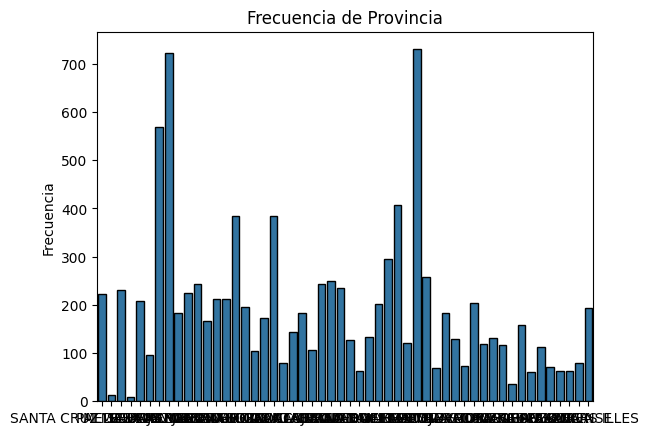

In [42]:
sns.countplot(x=df["Provincia"],edgecolor='black')
plt.title("Frecuencia de Provincia")
plt.xlabel("")
plt.ylabel("Frecuencia")
plt.show()

##Margen

###Frecuencia

In [43]:
print(df["Margen"].value_counts())

Margen
D    5016
I    2596
N    2379
Name: count, dtype: int64


###Gráfico

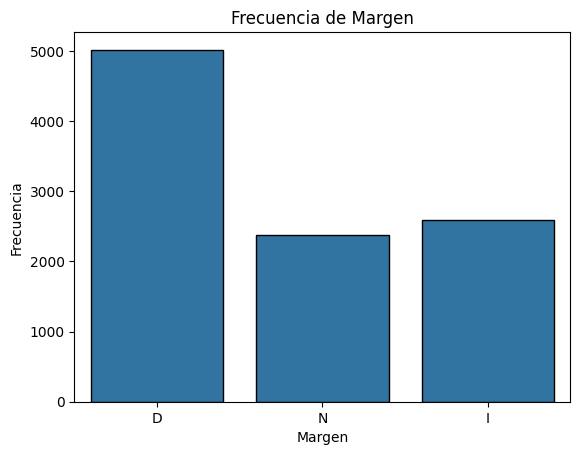

In [44]:
sns.countplot(x=df["Margen"],edgecolor='black')
plt.title("Frecuencia de Margen")
plt.xlabel("Margen")
plt.ylabel("Frecuencia")
plt.show()

##Precio

###Frecuencia

In [45]:
print(df["Precio"].value_counts())

Precio
1,199    698
1,179    687
1,189    616
1,169    582
1,209    545
        ... 
1,001      1
0,973      1
0,972      1
0,970      1
1,448      1
Name: count, Length: 360, dtype: int64


###Gráfico

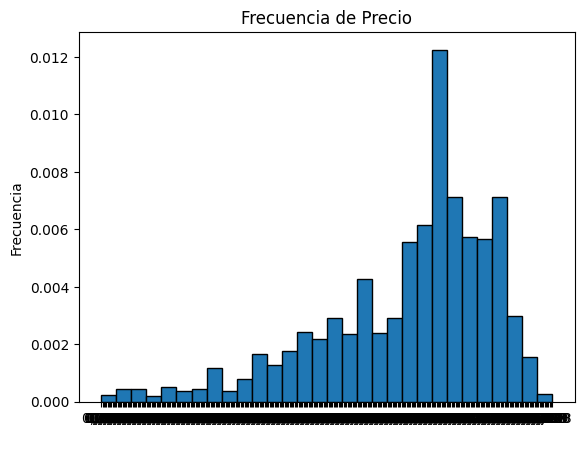

In [47]:
plt.hist(df["Precio"], bins=30, density=True, edgecolor='black')
plt.title("Frecuencia de Precio")
plt.xlabel(" ")
plt.ylabel("Frecuencia")
plt.show()